In [1]:
!rm -rf DL_Data_sets/
!git clone --branch images https://github.com/octavio-navarro/DL_Data_sets.git

Cloning into 'DL_Data_sets'...
remote: Enumerating objects: 64969, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (491/491), done.
remote: Total 64969 (delta 13), reused 493 (delta 9), pack-reused 64469 (from 1)
Receiving objects: 100% (64969/64969), 1.54 GiB | 33.95 MiB/s, done.
Resolving deltas: 100% (136/136), done.


# Filters

In image processing and computer vision, noise refers to any unwanted or random variations of pixel intensity in an image that obscure the true visual information. Noise typically originates from various sources, such as environmental conditions, sensor limitations, or transmission errors, and can significantly degrade the quality of an image. We normally use filters to try to remove noise.

Filters are algorithms or techniques applied to images to enhance or modify their visual properties. They are often used for tasks like noise reduction, edge detection, blurring, sharpening, and feature extraction. They operate by manipulating the pixel values of the image based on a specific rule or mathematical operation.

Basically, they filter out unwanted or irrelevant information in an image, or to amplify features like object boundaries or other distinguishing traits.


## Frequency in images

Frequency in images is a rate of change: the rate at which pixel intensity values change across an image. Just like in audio signals, where frequency indicates how rapidly sound waves oscillate, in images, frequency describes the variation of pixel intensities, such as edges, textures, and smooth regions. The concept of frequency is essential for understanding how an image can be broken down into its high-frequency and low-frequency components.

1. Low-Frequency Components:

- These correspond to slow or gradual changes in pixel intensity, such as smooth gradients or large uniform areas. For instance, a clear sky or a solid-colored object in an image contains low-frequency information because there is little variation in color or intensity over large areas.
- A low-frequency image may be one that is relatively uniform in brightness or changes very slowly.
- Low-frequency details usually represent the general structure and basic forms in the image.

2. High-Frequency Components:

- These refer to rapid changes in pixel intensity, such as sharp edges, fine textures, and small details. For example, the boundary between two distinct objects or fine-grained textures in a fabric represent high-frequency information.
- A high-frequency image is one where the intensity changes a lot, and the level of brightness changes quickly from one pixel to the next.
- High-frequency details are critical for identifying edges and sharp features in the image.

![High and low frequency images](https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/main/Notebooks/images/high-low_frequency.png)

## Convolution

Convolution is a powerful and widely used technique in image processing
and other areas of science. We start by defining the convolution of two functions f(x) and g(x) as the integral:

$f(x) \ast g(x) = \int_{-\inf}^{\inf} f(u) g(x-u) du$

The action of this integral is normally described as the result of applying a point spread function $g(x)$ to all points of a function $f(x)$ and accumulating the contributions at every point.

When convolution is applied to digital images, the above formulation changes
in two ways:

1. a double integral must be used in respect of the two dimensions
2. integration must be changed into discrete summation

The new form of the convolution is:

$ F(x, y) = \sum_i \sum_j f(x+i, y+j) h(i, j)$

which involves multiplying corresponding values in the modified mask and the neighborhood under consideration. Re-expressing this result for a 3 x 3 neighborhood
and writing the mask coefficients in the form:

$
\begin{bmatrix}
h1 & h2 & h4 \\
h4 & h5 & h6 \\
h7 & h8 & h9 \\
\end{bmatrix}
$

the algorithm can be obtained in terms of our earlier notation:

```
for all pixels in image do {
Q0 = P0 * h0 + P1 * h1 + P2 * h2 + P3 * h3 + P4 * h4 + P5 * h5 + P6 * h6 + P7 * h7 + P8 * h8;
}
```


## Convolution Kernels

A kernel is a matrix of numbers that modifies and image. An example of an edge detection filter is the laplacian:


$\begin{pmatrix} 0&-1&0\\ -1&4&-1 \\ 0&-1&0 \end{pmatrix}$


It is a three by three kernel whose elements all sum to zero. It is important that these kernels sum to zero, because they calculate the differente or change between neighboring pixels.

Differences are calculated by substracting pixel values from one another. In this case, substracting the value of the pixels that surround a center pixel. To apply this kernel, an image is convolved with this kernel.

A convolution is performed by taking a kernel and passing it over an image pixel by pixel, transforming it based on these numbers.

![Convolution](https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/main/Notebooks/images/Convolution.png)

## Creating a Filter for Edge Detection

## High-Pass Filters

High pass filters are used to make an image appear sharper and enchance high-frequency parts of an image: neighboring pixels rapidly change, like from very dark to very light pixels. Since these are patterns of intensity, the these filters will operate on grayscale images that represent this information and display patterns of lightness and darkness in a simple format.

In areas where a pixel is way brighter than its immediate neighbors, the high-pass filter will enhance that change and create a line. This emphasizes edges, which are areas in an image where the intensity changes very quickly, and often indicate object boundaries.

![Lena](https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/main/Notebooks/images/lena_edges.png)

### Import resources

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

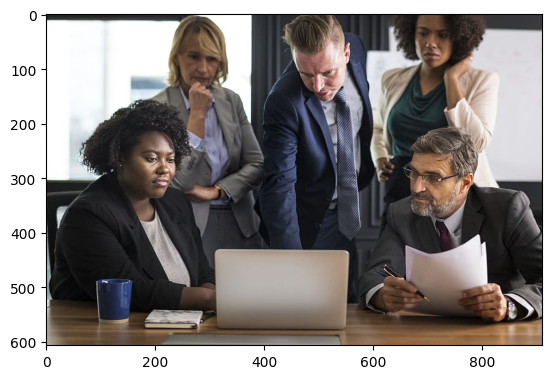

In [3]:
# Read in the image
image_people = cv2.imread('/content/DL_Data_sets/images/business_people.jpg')
image_people = cv2.cvtColor(image_people, cv2.COLOR_BGR2RGB)

plt.imshow(image_people)

### Convert the image to grayscale

(607, 910)


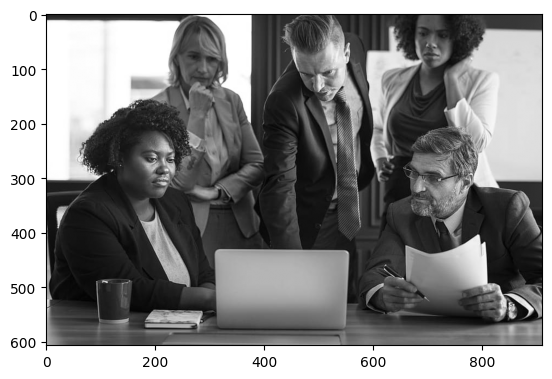

In [4]:
# Convert to grayscale for filtering
gray_people = cv2.cvtColor(image_people, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_people, cmap='gray')

print(gray_people.shape)

### Challenge: Create and apply a custom kernel

Implement your own filtered image by applying the [Sobel](https://en.wikipedia.org/wiki/Sobel_operator) operators to the image.

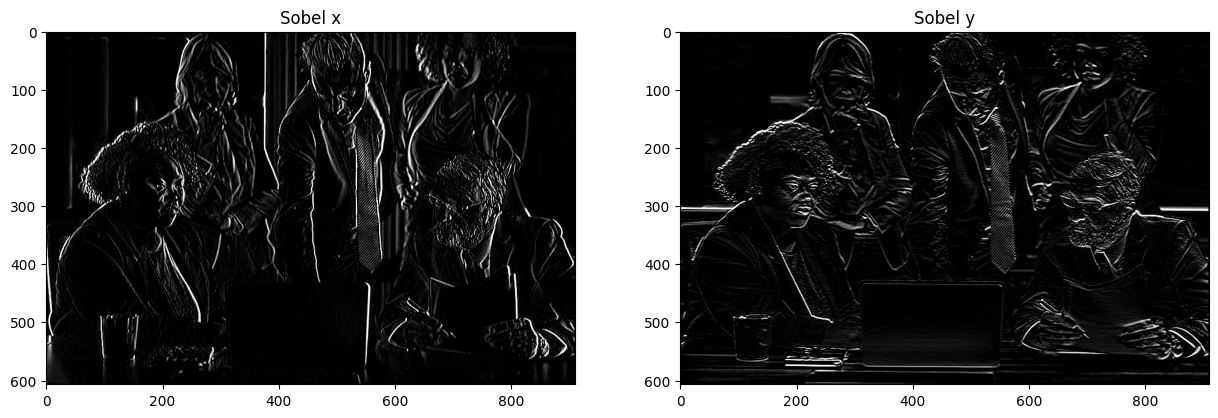

In [10]:
# Create a custom kernel

import numpy as np

# 3x3 array for edge detection
sobel_y = np.array([
                    [ 1, 2, 1],
                    [ 0, 0, 0],
                    [ -1, -2, -1]
                    ])

sobel_x = np.array([
                    [ 1, 0, -1],
                    [ 2, 0, -2],
                    [ 1, 0, -1]])

# Get the shape of the image
y_limit, x_limit = gray_people.shape



def apply_2d_filter(original_img: np.array, filter: np.array) -> np.array:
  new_img = np.zeros(original_img.shape, dtype=np.uint8)
  for i in range(1, y_limit - 1):
    for j in range(1, x_limit - 1):
      sums = np.sum(original_img[i-1:i+2, j-1:j+2] * filter)

      # ensuring our resutl stays withing the grayscale img range
      sums = min(255, sums)
      sums = max(0, sums)

      new_img[i, j] = sums

  return new_img

filtered_people_x_custom = apply_2d_filter(gray_people, sobel_x)
filtered_people_y_custom = apply_2d_filter(gray_people, sobel_y)


f, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.set_title('Sobel x')
ax1.imshow(filtered_people_x_custom, cmap='gray')

ax2.set_title('Sobel y')
ax2.imshow(filtered_people_y_custom, cmap='gray')

Fortunately, OpenCV already has a function to apply kernels to filter images: **cv2.filter2D**

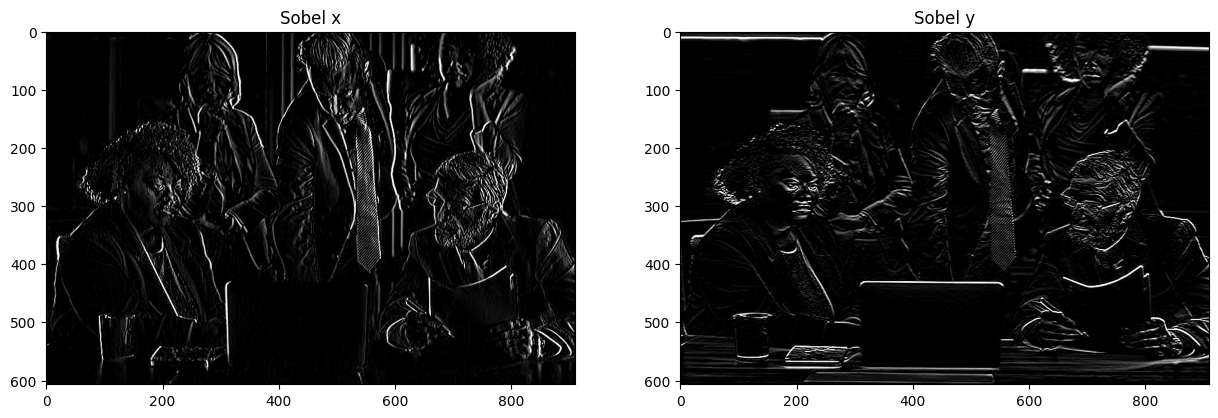

In [ ]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])

sobel_x = np.array([[ -1, 0, 1],
                   [ -2, 0, 2],
                   [ -1, 0, 1]])

filtered_people_x = cv2.filter2D(gray_people, -1, sobel_x)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_people_y = cv2.filter2D(gray_people, -1, sobel_y)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.set_title('Sobel x')
ax1.imshow(filtered_people_x, cmap='gray')

ax2.set_title('Sobel y')
ax2.imshow(filtered_people_y, cmap='gray')

### Create binary images

One of the important practical aims of image processing is the demarcation of
objects appearing in digital images. This process is called segmentation, and a
good approximation to it can often be achieved by thresholding. Broadly, this
involves separating the dark and light regions of the image, and thus identifying
dark objects on a light background (or vice versa).

For implementation details, look at the [documentation for the threshold method](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57).

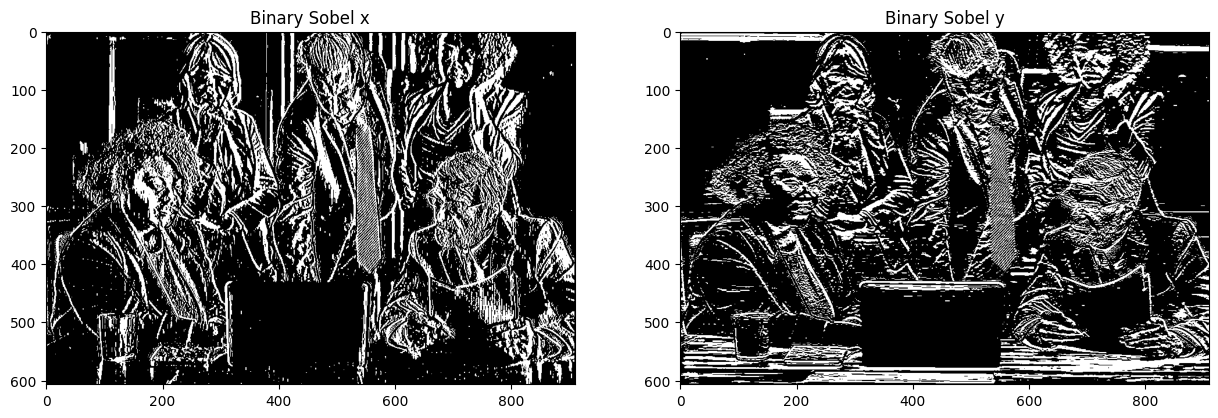

In [ ]:
# The threshold value of 10 means that all pixels with values below or equal to 10 are converted into 0 (black), and all pixels with values above 10 are converted into 255 (white).
retval, binary_image_x = cv2.threshold(filtered_people_x, 10, 255, cv2.THRESH_BINARY)
retval, binary_image_y = cv2.threshold(filtered_people_y, 10, 255, cv2.THRESH_BINARY)

# There are adaptive thresholding techniques, such as Otsu or Triangle. The value stored in retval is the computed threshold value if Otsu's or Triangle methods used.
f2, (ax21,ax22) = plt.subplots(1, 2, figsize=(15,5))
ax21.set_title('Binary Sobel x')
ax21.imshow(binary_image_x, cmap='gray')

ax22.set_title('Binary Sobel y')
ax22.imshow(binary_image_y, cmap='gray')

## Low-pass filters

Noise in an image is generally seen as speckles or discoloration in an image, which usually does not contain useful information. It may even affect the outcome of image processing steps; high-pass filters can amplify the noise if it not removed first. Low-pass filters are used to remove this noise. They block certain high frequency content and blur or smooth the appearance of the image, reducing high frequency noise.

The simples low-pass filter is the averaging kernel:

$\frac{1}{9} \left( \begin{matrix} 1&1&1\\ 1&1&1 \\ 1&1&1 \end{matrix} \right)$

These filters typically take an average of neighboring pixels, and not a difference.

### Gaussian Blur

Unlike the averaging kernel, the Gaussian blur kernel blurs the image, while also preserving edge information, making it, perhaps, the most frequently used filter in computer vision. It is essentially a weighted average that gives the most weight to the center, while also considering the surrounding pixels.

$\frac{1}{16} \left( \begin{matrix} 1&2&1\\ 2&4&2 \\ 1&2&1 \end{matrix} \right)$

### Gaussian blur an image

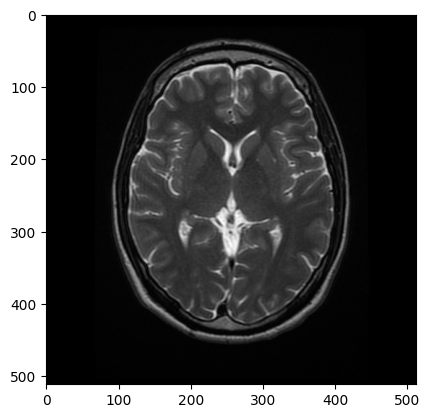

In [ ]:
# blurring is often used in medical applications that have too much noise
image_brain = cv2.imread('/content/DL_Data_sets/images/brain_MR.jpg')

gray_brain = cv2.cvtColor(image_brain, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_brain, cmap='gray')### Import resources and display image

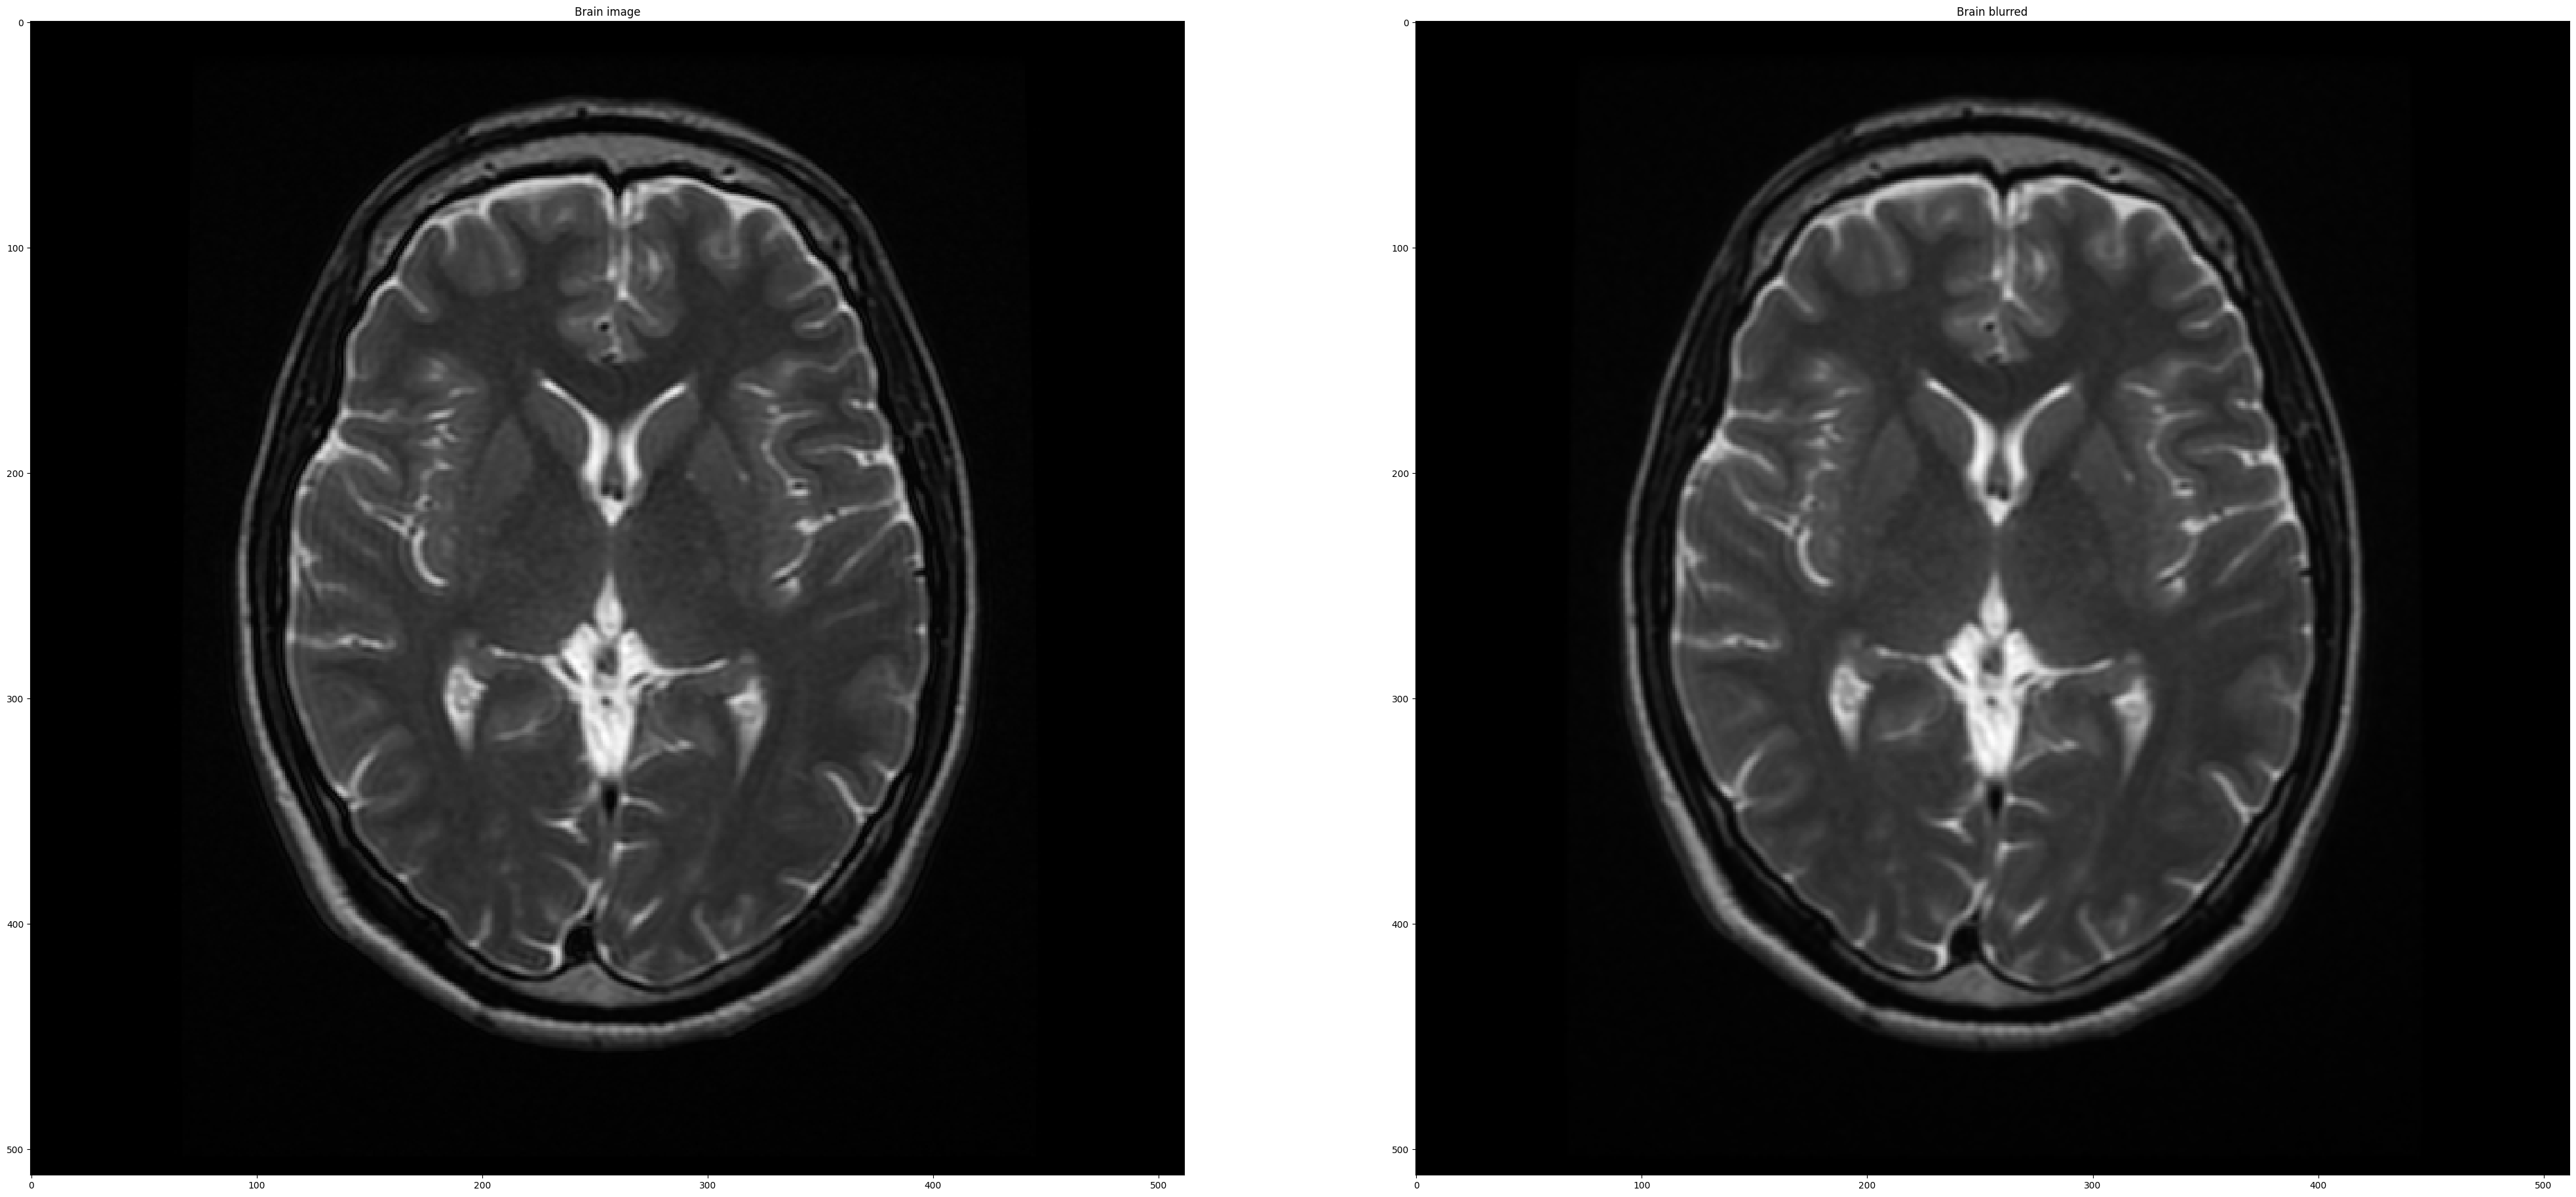

In [ ]:
# take the gray scale people image and apply a gaussian blur
# the kernel has to be of odd dimensions so that it can be centered at each pixel
gray_brain_blur = cv2.GaussianBlur(gray_brain, (3, 3), 0)

f3, (ax31,ax32) = plt.subplots(1, 2, figsize=(50,30))
ax31.set_title('Brain image')
ax31.imshow(gray_brain, cmap='gray')

ax32.set_title('Brain blurred')
ax32.imshow(gray_brain_blur, cmap='gray')

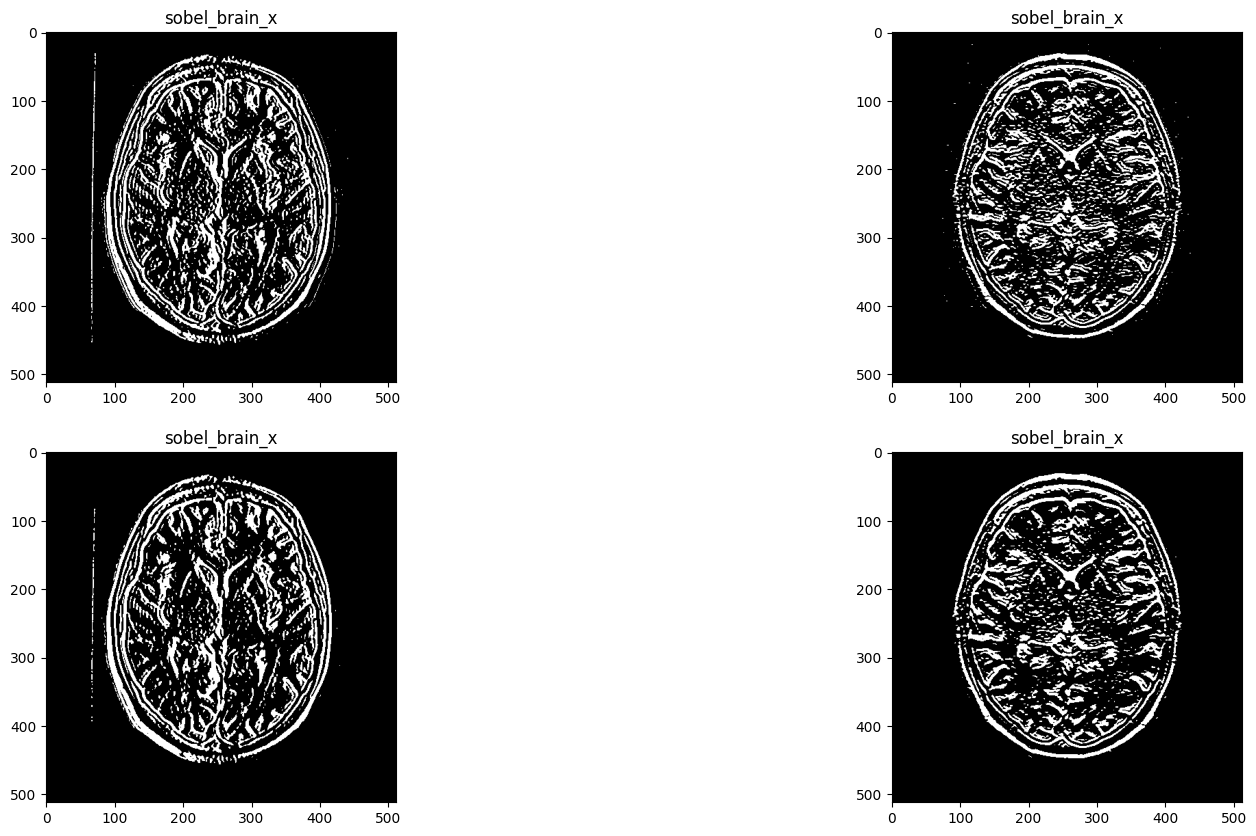

In [ ]:
sobel_brain_x = cv2.filter2D(gray_brain, -1, sobel_x)
sobel_brain_y = cv2.filter2D(gray_brain, -1, sobel_y)

sobel_brain_blur_x = cv2.filter2D(gray_brain_blur, -1, sobel_x)
sobel_brain_blur_y = cv2.filter2D(gray_brain_blur, -1, sobel_y)

retval, binary_brain_x = cv2.threshold(sobel_brain_x, 10, 255, cv2.THRESH_BINARY)
retval, binary_brain_y = cv2.threshold(sobel_brain_y, 10, 255, cv2.THRESH_BINARY)

retval, binary_brain_blur_x = cv2.threshold(sobel_brain_blur_x, 10, 255, cv2.THRESH_BINARY)
retval, binary_brain_blur_y = cv2.threshold(sobel_brain_blur_y, 10, 255, cv2.THRESH_BINARY)

f4, ((ax41,ax42), (ax43, ax44)) = plt.subplots(2, 2, figsize=(20,10))

ax41.set_title('sobel_brain_x')
ax41.imshow(binary_brain_x, cmap='gray')

ax42.set_title('sobel_brain_x')
ax42.imshow(binary_brain_y, cmap='gray')

ax43.set_title('sobel_brain_x')
ax43.imshow(binary_brain_blur_x, cmap='gray')

ax44.set_title('sobel_brain_x')
ax44.imshow(binary_brain_blur_y, cmap='gray')

## Canny edge detection

Even with low pass and high pass filters, edge detection is still a very complex problem. We have to think about what level of intensity change constitutes an edge and how we can consistently detect and represent both thin and thick edges. One of the best and most frequently used edge detectors that takes all of these questions into account is the canny edge detector.

Canny edge detection goes through a series of steps that consistently produce accurately detected edges.

1. It filters out noise using a Gaussian blur.
2. It finds the strength and direction of edges in an image using Sobel filters.
3. Using the output of the Sobel filters Canny then applies non-maximum suppression which looks at the strength and direction of each detected edge and selects the local maximum pixel to create consistent one pixel wide thin lines that align with the strongest edges.
4. Finally, it uses a process called hysteresis thresholding to isolate the best edges.

![Hysteresis](https://raw.githubusercontent.com/octavio-navarro/Computer-Vision/main/Notebooks/images/hysteresis_thresholding.jpg)

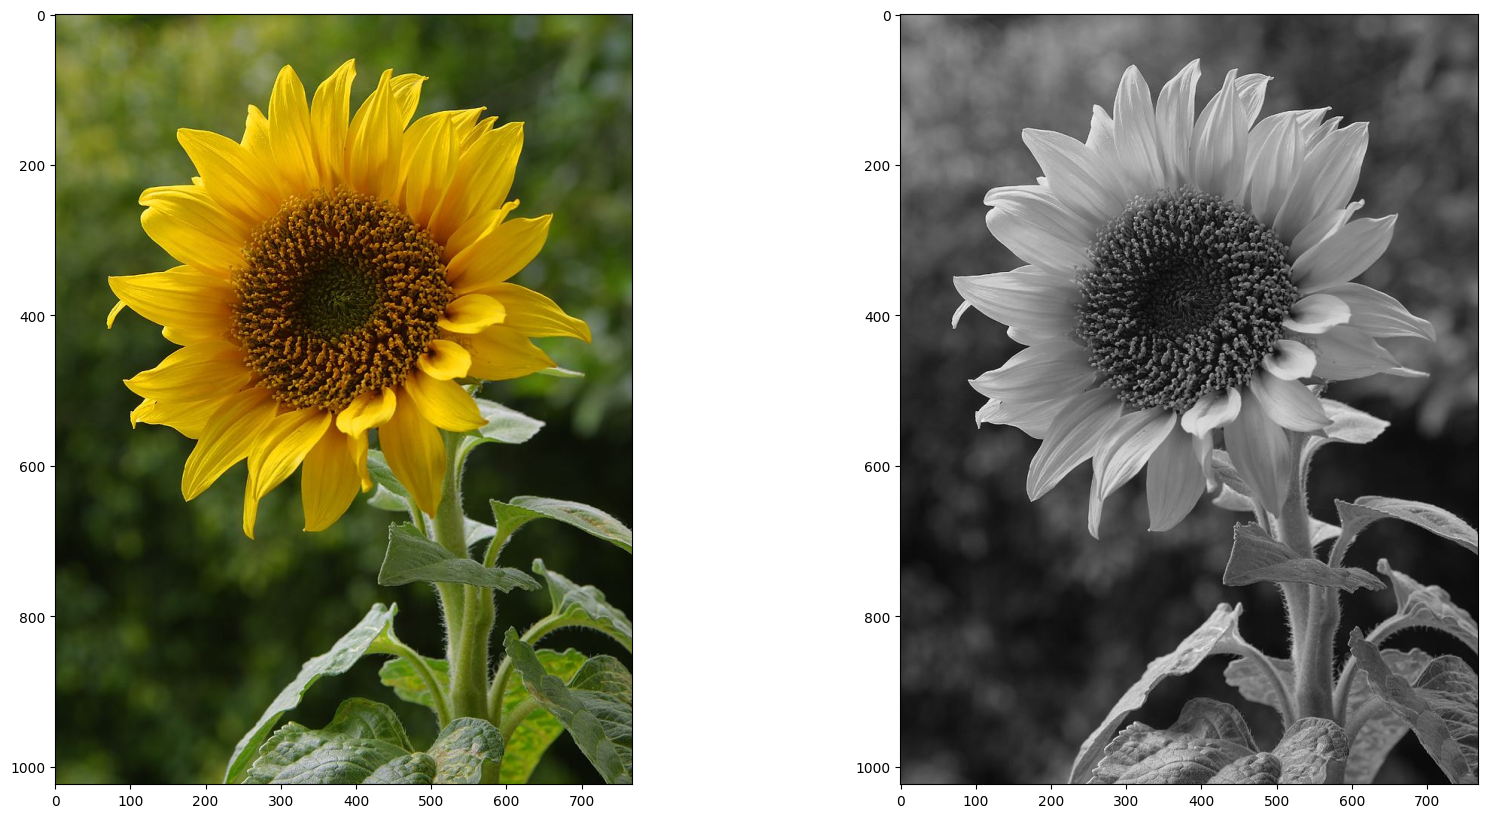

In [ ]:
# load an image
sunflower_image = cv2.imread('/content/DL_Data_sets/images/sunflower.jpg')
sunflower_image_copy = cv2.cvtColor(sunflower_image, cv2.COLOR_BGR2RGB)

# convert to grayscale
sunflower_gray = cv2.cvtColor(sunflower_image_copy, cv2.COLOR_RGB2GRAY)

# display both images
f5, (ax51,ax52) = plt.subplots(1, 2, figsize=(20,10))

ax51.imshow(sunflower_image_copy)
ax52.imshow(sunflower_gray, cmap="gray")

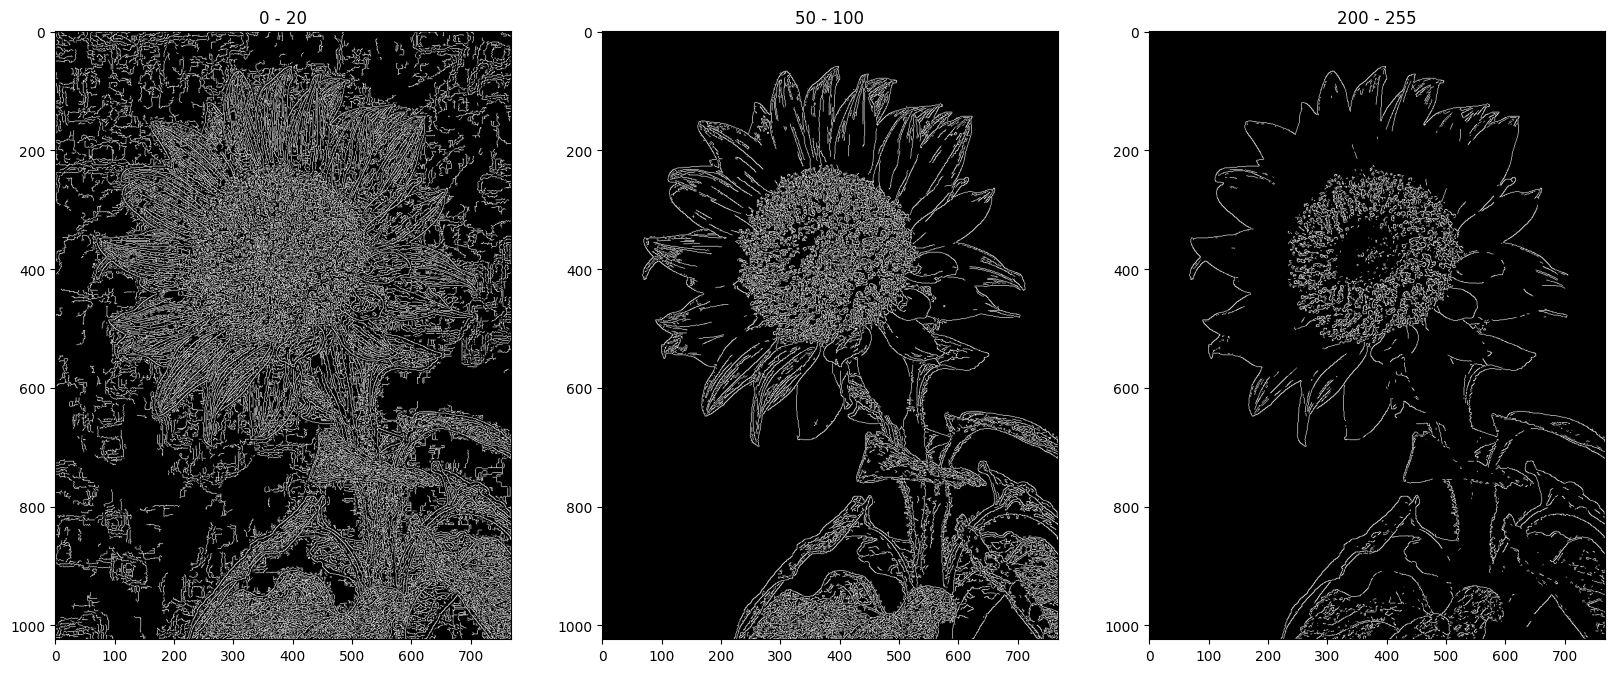

In [ ]:
sunflower_edges = cv2.Canny(sunflower_gray, 0, 20)
f6, (ax61, ax62, ax63) = plt.subplots(1, 3, figsize=(20,10))
ax61.set_title('0 - 20')
ax61.imshow(sunflower_edges, cmap = 'gray')

sunflower_edges = cv2.Canny(sunflower_gray, 50, 100)
ax62.set_title('50 - 100')
ax62.imshow(sunflower_edges, cmap = 'gray')

sunflower_edges = cv2.Canny(sunflower_gray, 200, 240)
ax63.set_title('200 - 255')
ax63.imshow(sunflower_edges, cmap = 'gray')

Canny detects boundaries quite well, and produces a binary image within the lines. This becomes very useful when we want to select a certain area of interest to mask or further analyze.

## Additional filters

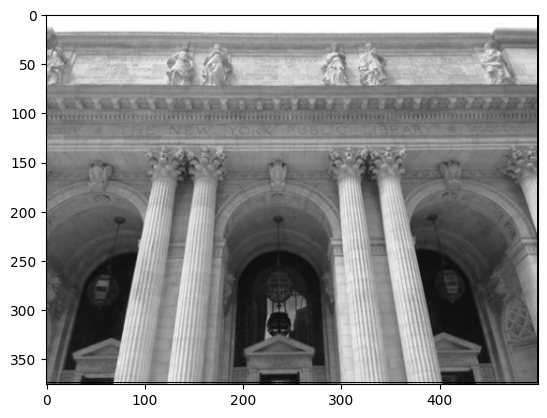

In [ ]:
archway_image = cv2.imread('/content/DL_Data_sets/images/archway.png')
archway_image = cv2.cvtColor(archway_image, cv2.COLOR_BGR2RGB)

plt.imshow(archway_image)

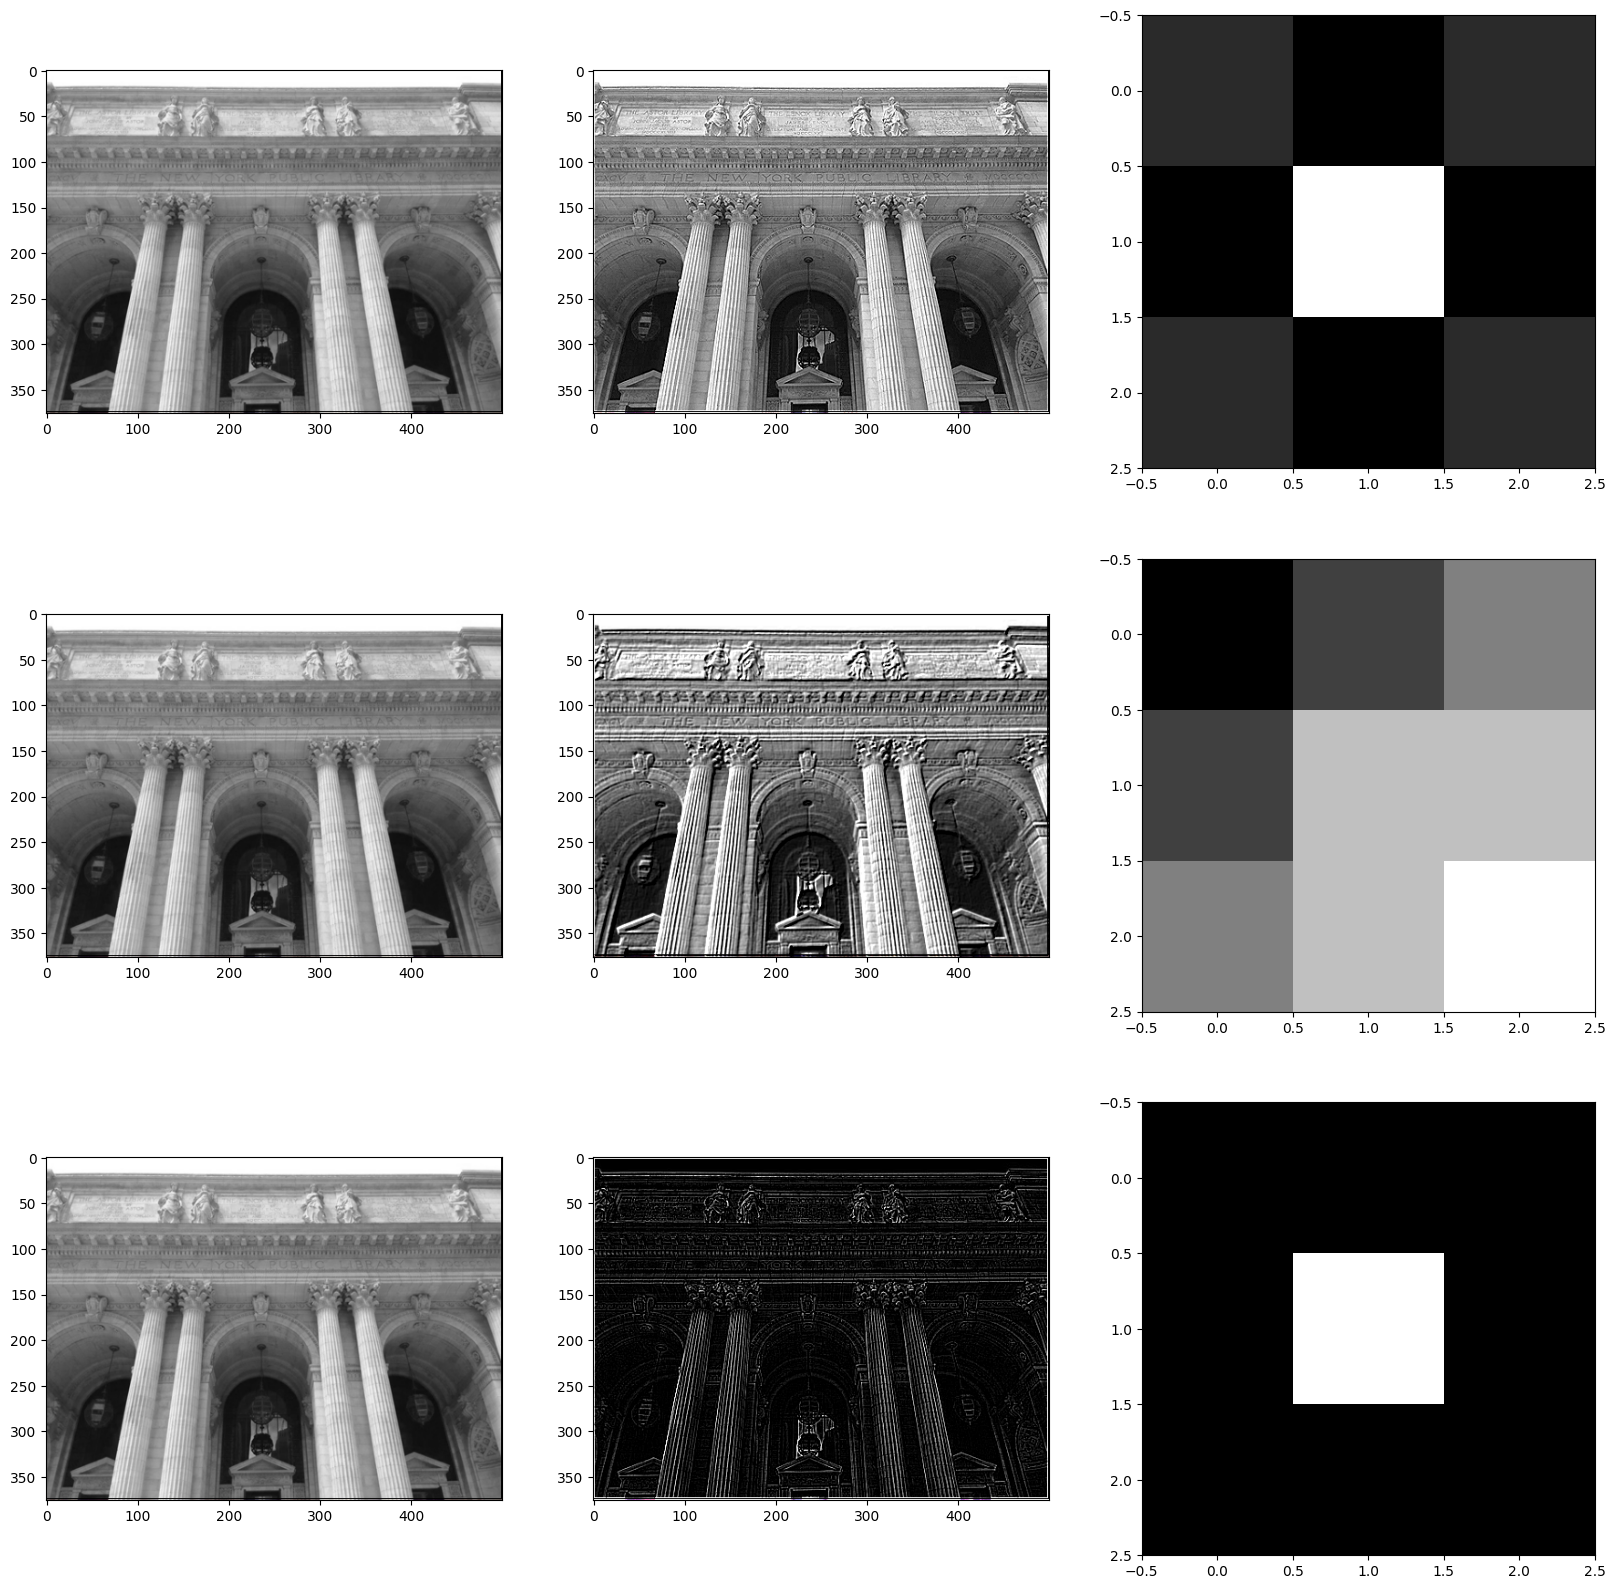

In [ ]:
sharpen_filter = np.array([
   [0, -1, 0],
   [-1, 5, -1],
   [0, -1, 0]
])

emboss_filter = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

outline_filter = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

sharpen = cv2.filter2D(archway_image, -1, sharpen_filter)
emboss = cv2.filter2D(archway_image, -1, emboss_filter)
outline = cv2.filter2D(archway_image, -1, outline_filter)

f, axes = plt.subplots(3, 3, figsize=(20, 20))
axes[0][0].imshow(archway_image)
axes[0][1].imshow(sharpen)
axes[0][2].imshow(sharpen_filter, cmap='gray')
axes[1][0].imshow(archway_image)
axes[1][1].imshow(emboss)
axes[1][2].imshow(emboss_filter, cmap='gray')
axes[2][0].imshow(archway_image)
axes[2][1].imshow(outline)
axes[2][2].imshow(outline_filter, cmap='gray')